# Apply Family

In [2]:
# apply() arrays matrix
# tapply() divide vectors in subsets
# lapply() vectors and lists
# sapply() friendly version of lapply()
# vapply() like sapply() modifies the return
# rapply() like lapply()
# eapply() makes a list
# mapply() like sapply(), multvariation
# by() aggregation

In [5]:
list1 <- list(a = (1:20), b = (35:67))

In [7]:
#?sapply
sapply(list1, sum)

a    b 
 210 1683

In [8]:
sapply(list1, mean)

a    b 
10.5 51.0

In [10]:
A <- matrix(c(20, 13, 45, 73, 43, 92, 24, 87, 67), nr = 3, byrow = T)
A

20,13,45
73,43,92
24,87,67


In [13]:
apply(A, mean)

ERROR: Error in match.fun(FUN): argument "FUN" is missing, with no default


In [18]:
line = 1
apply(A, line, mean)

[1] 26.00000 69.33333 59.33333

In [16]:
column = 2
apply(A, column, mean)

[1] 39.00000 47.66667 68.00000

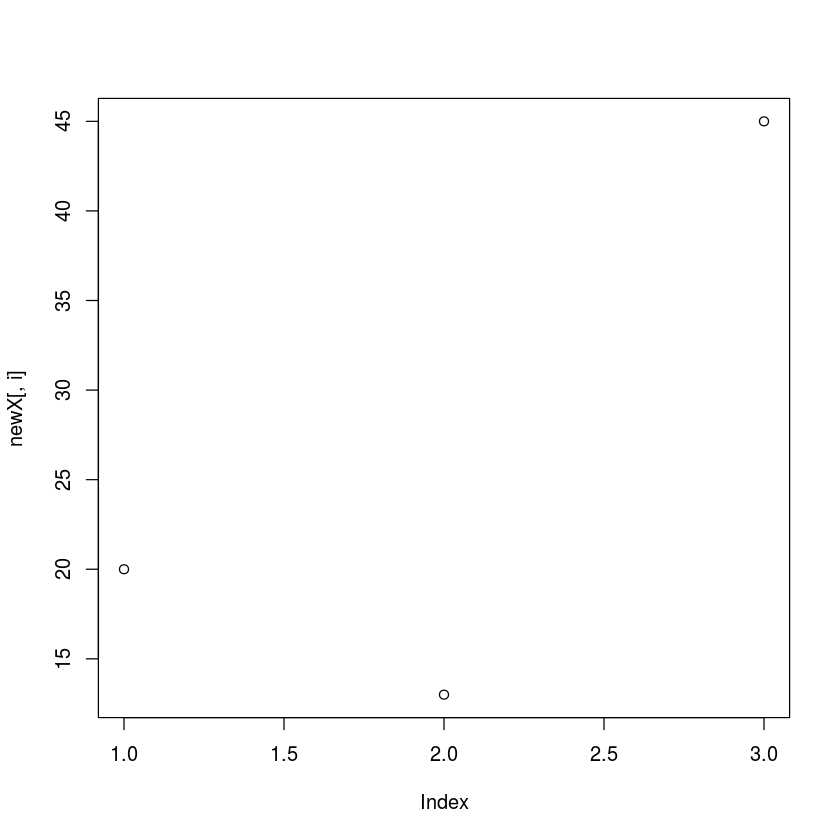

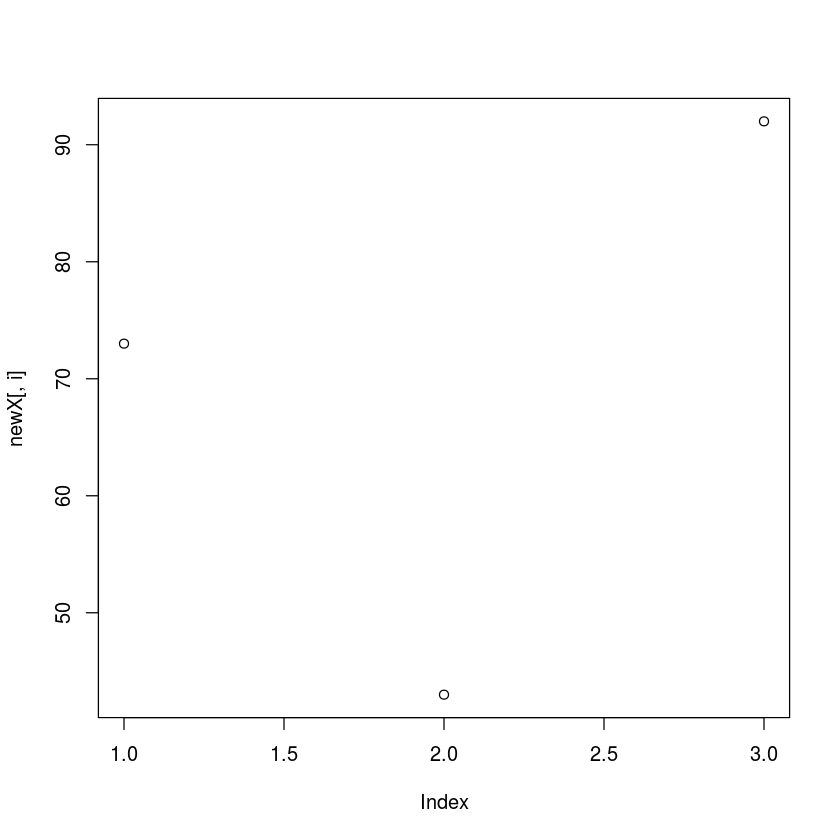

NULL

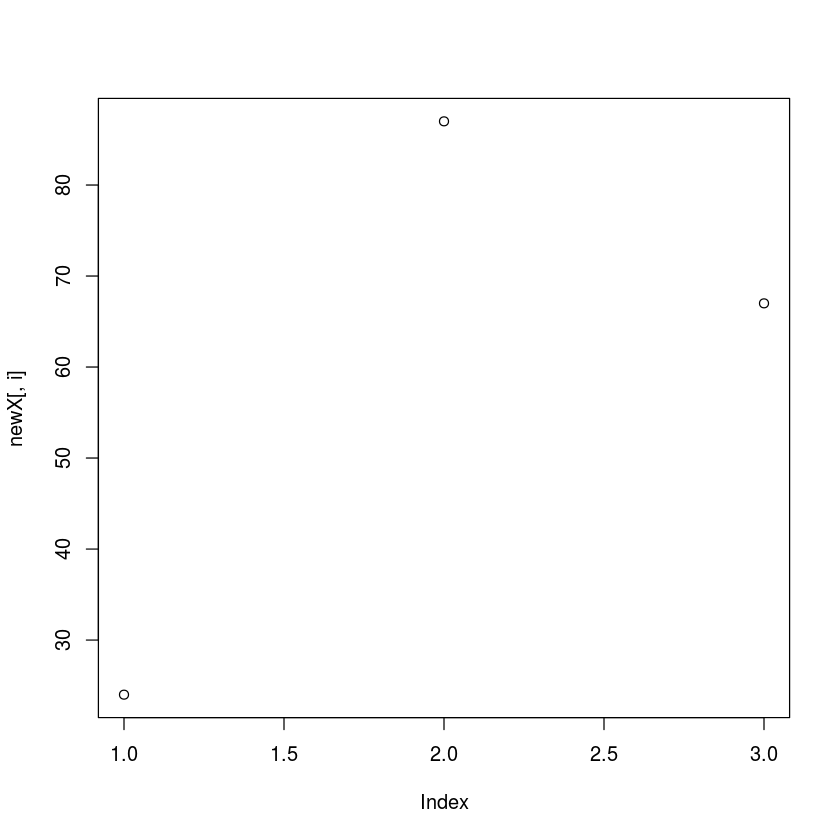

In [19]:
apply(A, line, plot)

In [20]:
result = apply(A, line, mean)
result

[1] 26.00000 69.33333 59.33333

In [21]:
school <- data.frame(Person = c('Bob', 'Alice', 'John', 'Elton', 'Mary', 'Raven'),
                    Fisics = c(91, 82, 75, 97, 62, 74),
                    Math = c(99, 100, 86, 92, 91, 87),
                    Chem = c(56, 72, 49, 68, 59, 80))
school

Person,Fisics,Math,Chem
Bob,91,99,56
Alice,82,100,72
John,75,86,49
Elton,97,92,68
Mary,62,91,59
Raven,74,87,80


In [22]:
school$Mean = NA
school

Person,Fisics,Math,Chem,Mean
Bob,91,99,56,NA
Alice,82,100,72,NA
John,75,86,49,NA
Elton,97,92,68,NA
Mary,62,91,59,NA
Raven,74,87,80,NA


In [24]:
school$Mean <- apply(school[, c(2,3,4)], 1, mean)
school

Person,Fisics,Math,Chem,Mean
Bob,91,99,56,82.00000
Alice,82,100,72,84.66667
John,75,86,49,70.00000
Elton,97,92,68,85.66667
Mary,62,91,59,70.66667
Raven,74,87,80,80.33333


In [25]:
school$Mean <- round(school$Mean)
school

Person,Fisics,Math,Chem,Mean
Bob,91,99,56,82
Alice,82,100,72,85
John,75,86,49,70
Elton,97,92,68,86
Mary,62,91,59,71
Raven,74,87,80,80


In [26]:
basket_table <- data.frame(team = gl(5, 5, labels = paste("Team", LETTERS[1:5])),
                          player = sample(letters, 25),
                          baskets = floor(runif(25, min = 0, max = 50)))
basket_table

team,player,baskets
Team A,o,38
Team A,y,44
Team A,b,39
Team A,f,37
Team A,h,46
Team B,m,31
Team B,j,11
Team B,u,34
Team B,s,26
Team B,i,10


In [27]:
summary(basket_table)

     team       player      baskets     
 Team A:5   a      : 1   Min.   : 0.00  
 Team B:5   b      : 1   1st Qu.:15.00  
 Team C:5   c      : 1   Median :30.00  
 Team D:5   d      : 1   Mean   :26.72  
 Team E:5   e      : 1   3rd Qu.:37.00  
            f      : 1   Max.   :47.00  
            (Other):19                  

In [29]:
install.packages("sqldf")
library(sqldf)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite


In [30]:
sqldf('select team, sum(baskets) from basket_table group by team')

team,sum(baskets)
Team A,204
Team B,112
Team C,79
Team D,133
Team E,140


In [37]:
tapply(basket_table$baskets, basket_table$team, sum)

ERROR while rich displaying an object: Error in dn[[2L]]: subscript out of bounds

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_markdown.numeric(obj)
9. repr_vector_generic(html_escape_names(obj), "%s. %s\n", "%s\n:   %s", 
 .     "**%s:** %s", "%s\n\n", item_uses_numbers = TRUE, escape_fun = html_escape)
10. html_escape_names(obj)
11. .escape_names(obj, "html")
12. colnames(obj)
ERROR while rich displaying an object: 

Team A Team B Team C Team D Team E 
   204    112     79    133    140

In [1]:
?by

by {base},R Documentation
data,"an R object, normally a data frame, possibly a matrix."
INDICES,"a factor or a list of factors, each of length nrow(data)."
FUN,a function to be applied to (usually data-frame) subsets of data.
...,further arguments to FUN.
simplify,logical: see tapply.


In [3]:
df <- data.frame(species = c(rep(c(1,2,3), each= 5)),
                 petal.length = c(rnorm(5, 4.5, 1),
                                 rnorm(5, 4.5, 1),
                                 rnorm(5, 5.5, 1)),
                 petal.width = c(rnorm(5, 2.5, 1),
                                rnorm(5, 2.5, 1),
                                rnorm(5, 4,1)))
df

species,petal.length,petal.width
1,5.942627,2.1502316
1,4.801101,2.1661464
1,4.093659,0.7221721
1,4.431366,3.8406273
1,5.467362,1.9684757
2,3.927413,1.9232020
2,3.744162,2.0276613
2,4.081711,3.4356954
2,4.928475,2.5576754
2,3.191427,2.3489924


In [4]:
df$species <- factor(df$species)
df

species,petal.length,petal.width
1,5.942627,2.1502316
1,4.801101,2.1661464
1,4.093659,0.7221721
1,4.431366,3.8406273
1,5.467362,1.9684757
2,3.927413,1.9232020
2,3.744162,2.0276613
2,4.081711,3.4356954
2,4.928475,2.5576754
2,3.191427,2.3489924


In [5]:
by(df, df$species, function(x) {
    mean.pl <- mean(x$petal.length)
})

df$species: 1
[1] 4.947223
------------------------------------------------------------ 
df$species: 2
[1] 3.974638
------------------------------------------------------------ 
df$species: 3
[1] 5.596422

In [6]:
?lapply

lapply {base},R Documentation
X,a vector (atomic or list) or an expression object. Other objects (including classed objects) will be coerced by base::as.list.
FUN,"the function to be applied to each element of X: see ‘Details’. In the case of functions like +, %*%, the function name must be backquoted or quoted."
...,optional arguments to FUN.
simplify,"logical or character string; should the result be simplified to a vector, matrix or higher dimensional array if possible? For sapply it must be named and not abbreviated. The default value, TRUE, returns a vector or matrix if appropriate, whereas if simplify = ""array"" the result may be an array of “rank” (=length(dim(.))) one higher than the result of FUN(X[[i]])."
USE.NAMES,"logical; if TRUE and if X is character, use X as names for the result unless it had names already. Since this argument follows ... its name cannot be abbreviated."
FUN.VALUE,a (generalized) vector; a template for the return value from FUN. See ‘Details’.
n,integer: the number of replications.
expr,"the expression (a language object, usually a call) to evaluate repeatedly."
x,"a list, typically returned from lapply()."
higher,"logical; if true, simplify2array() will produce a (“higher rank”) array when appropriate, whereas higher = FALSE would return a matrix (or vector) only. These two cases correspond to sapply(*, simplify = ""array"") or simplify = TRUE, respectively."


In [8]:
list1 <- list(a = (1:10), b = (45:77))

In [9]:
lapply(list1, sum)

$a
[1] 55

$b
[1] 2013

In [10]:
sapply(list1, sum)

a    b 
  55 2013

In [11]:
?vapply

lapply {base},R Documentation
X,a vector (atomic or list) or an expression object. Other objects (including classed objects) will be coerced by base::as.list.
FUN,"the function to be applied to each element of X: see ‘Details’. In the case of functions like +, %*%, the function name must be backquoted or quoted."
...,optional arguments to FUN.
simplify,"logical or character string; should the result be simplified to a vector, matrix or higher dimensional array if possible? For sapply it must be named and not abbreviated. The default value, TRUE, returns a vector or matrix if appropriate, whereas if simplify = ""array"" the result may be an array of “rank” (=length(dim(.))) one higher than the result of FUN(X[[i]])."
USE.NAMES,"logical; if TRUE and if X is character, use X as names for the result unless it had names already. Since this argument follows ... its name cannot be abbreviated."
FUN.VALUE,a (generalized) vector; a template for the return value from FUN. See ‘Details’.
n,integer: the number of replications.
expr,"the expression (a language object, usually a call) to evaluate repeatedly."
x,"a list, typically returned from lapply()."
higher,"logical; if true, simplify2array() will produce a (“higher rank”) array when appropriate, whereas higher = FALSE would return a matrix (or vector) only. These two cases correspond to sapply(*, simplify = ""array"") or simplify = TRUE, respectively."


In [12]:
vapply(list1, fivenum, c(Min. = 0, "1st Qu." = 0, Median = 0, "3rd Qu." = 0, Max = 0))

,a,b
Min.,1.0,45
1st Qu.,3.0,53
Median,5.5,61
3rd Qu.,8.0,69
Max,10.0,77


In [13]:
mapply(rep, 1:4, 4:1)

[[1]]
[1] 1 1 1 1

[[2]]
[1] 2 2 2

[[3]]
[1] 3 3

[[4]]
[1] 4

In [15]:
list2 <- list(a = c(1:5), b = c(6:10))
list2

$a
[1] 1 2 3 4 5

$b
[1]  6  7  8  9 10

In [17]:
rapply(list2, sum)

a  b 
15 40

In [18]:
rapply(list2, sum, how = 'list')

$a
[1] 15

$b
[1] 40